# Prosper Loan Data Exploration Analysis 
## by Zhengyang Zhang

## Preliminary Wrangling

> This is the dataset for prosper loan. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/09 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/09 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> This is a dataset about prosper loan data. It has 113937 rows and 81 columns, I obtained from the Udacity website. 

### What is/are the main feature(s) of interest in your dataset?

> My main feature of interest is ProsperScore 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The feature like DebtToIncomeRatio,TotalInquiries,ListingCategory,MonthlyLoanPayment,TotalProsperPaymentsBilled,IsBorrowerHomeowner

## Univariate Exploration


Text(0.5, 1.0, 'Histogram for Prosper Score')

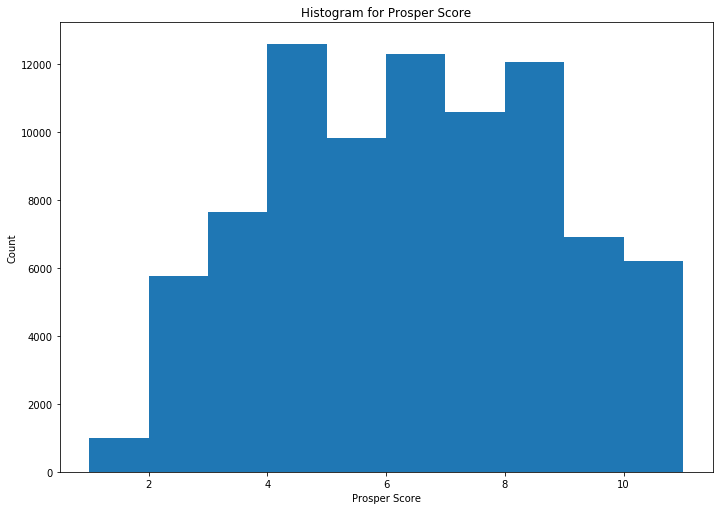

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
bins = np.arange(1,df['ProsperScore'].max()+1,1)
plt.hist(data = df, x = 'ProsperScore', bins = bins)
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title('Histogram for Prosper Score')

> From the above plot, we're able to see the prosper score are concentrated between 4 to 9, with very few people below 2. 

Text(0.5, 1.0, 'Horizontal Bar Chart for Listing Category')

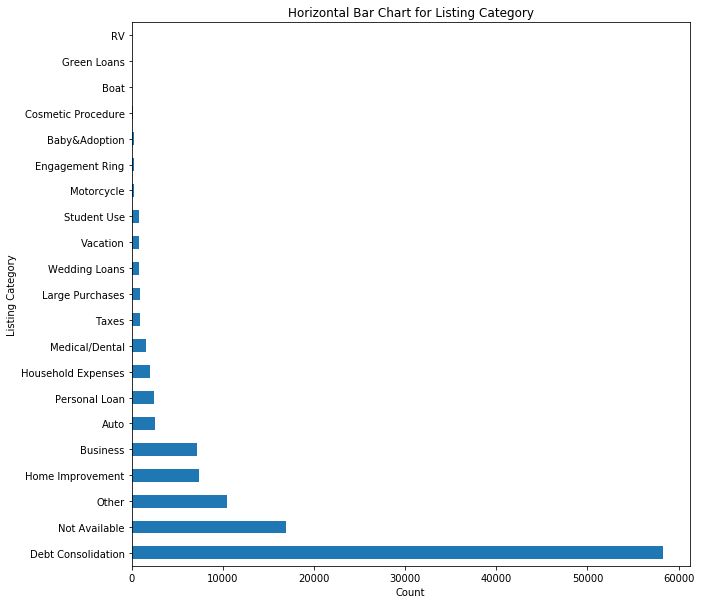

In [18]:
category_dict = {0:'Not Available', 
                 1:'Debt Consolidation',
                 2:'Home Improvement',
                 3:'Business',
                 4:'Personal Loan',
                 5:'Student Use',
                 6:'Auto',
                 7:'Other',
                 8:'Baby&Adoption',
                 9:'Boat',
                 10:'Cosmetic Procedure',
                 11:'Engagement Ring',
                 12:'Green Loans',
                 13:'Household Expenses',
                 14:'Large Purchases',
                 15:'Medical/Dental',
                 16:'Motorcycle',
                 17:'RV',
                 18:'Taxes',
                 19:'Vacation',
                 20:'Wedding Loans'}
df_cat = df['ListingCategory (numeric)'].value_counts()
index = df_cat.index.map(lambda x: category_dict[x])
df_cat.index = index
df_cat.plot(kind = 'barh', figsize = (10,10))
plt.xlabel('Count')
plt.ylabel('Listing Category')
plt.title('Horizontal Bar Chart for Listing Category')


> From the above chart, we're able to see that most people borrow money from Prosper loan for Debt Consolidation. 

Text(0.5, 1.0, 'Histogram for Debt to Income Ratio')

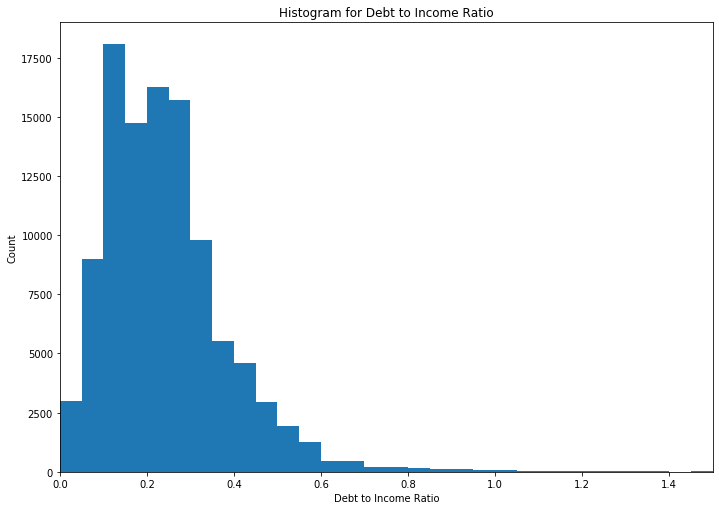

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
bins = np.arange(0,df['DebtToIncomeRatio'].max()+0.05,0.05)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim((0,1.5))
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title('Histogram for Debt to Income Ratio')

> From the above chart, we're able to see that most Debt to income ratio fall between 0.1 to 0.3, there are couple outlier with ratio above 1 which I didn't show in this plot.  

Text(0.5, 1.0, 'Histogram for Total Inquiries')

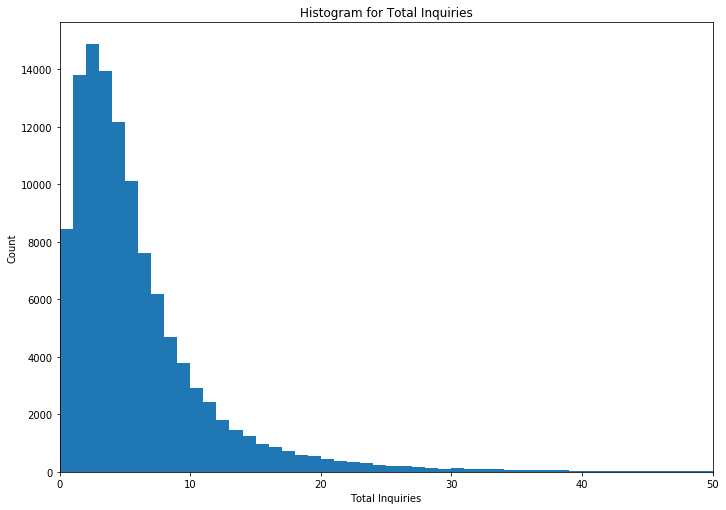

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
bins = np.arange(0,df['TotalInquiries'].max()+1,1)
plt.hist(data = df, x = 'TotalInquiries',bins = bins )
plt.xlim((0,50))
plt.xlabel('Total Inquiries')
plt.ylabel('Count')
plt.title('Histogram for Total Inquiries')

> Most people have inqueries between 0 to 10, only small percentage of people will have more than 20 inqueries. 

Text(0.5, 1.0, 'Histogram for Monthly Loan Payment')

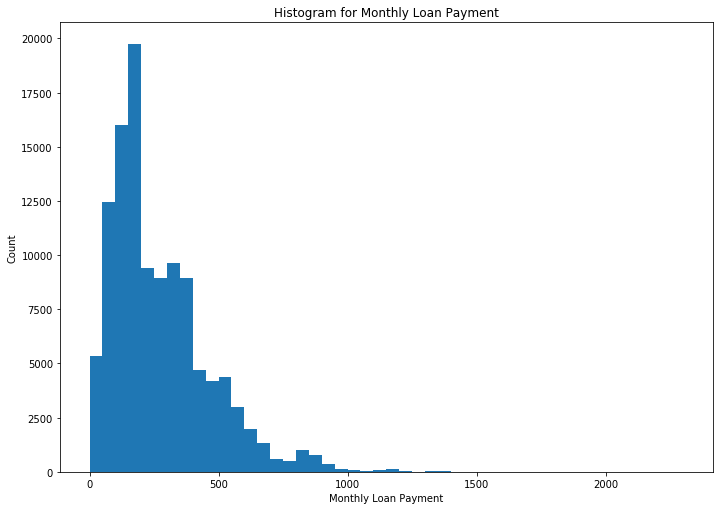

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
bins = np.arange(0,df['MonthlyLoanPayment'].max()+50,50)
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Count')
plt.title('Histogram for Monthly Loan Payment')

> We can see from the above plot, most people make less than 500 dollar per month as the payment for the loan. 

Text(0.5, 1.0, 'Histogram for Total Prosper Payments billed')

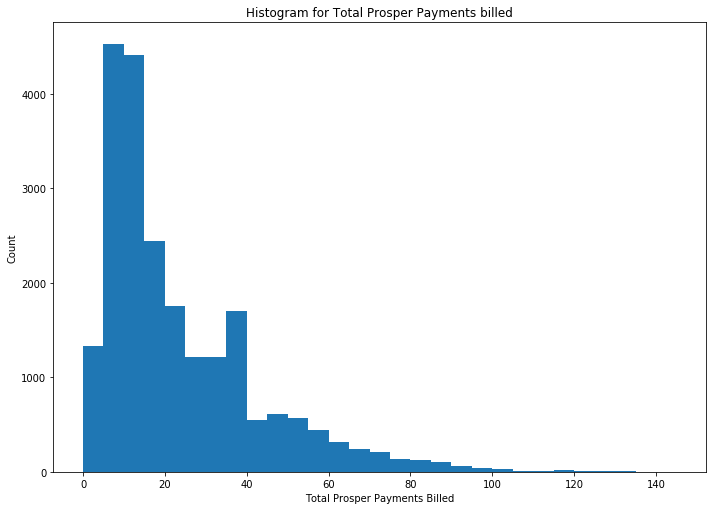

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
bins = np.arange(0,df['TotalProsperPaymentsBilled'].max()+5,5)
plt.hist(data = df, x = 'TotalProsperPaymentsBilled', bins = bins)
plt.xlabel('Total Prosper Payments Billed')
plt.ylabel('Count')
plt.title('Histogram for Total Prosper Payments billed')

> Most people only make less than 20 on time payment, very few people make more than 80 on time payments. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> It almost looks like a normal, but not quite. There isn't any usual point since the ProsperScore has a scale, so I don't necessarily need to scale the distribution for my variable of interests.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Of all the variables I investigated, I have to pretty much scale every variable I investigate to make sure I can see something from the distributions. All the variable I either perform a xlim to reduce the limit on x-axis or use np.arange to find the optimal bins for the distributions.  

## Bivariate Exploration


Text(0.5, 1, 'Scatter Plot for Debt to Income Ratio and Total Inquiries')

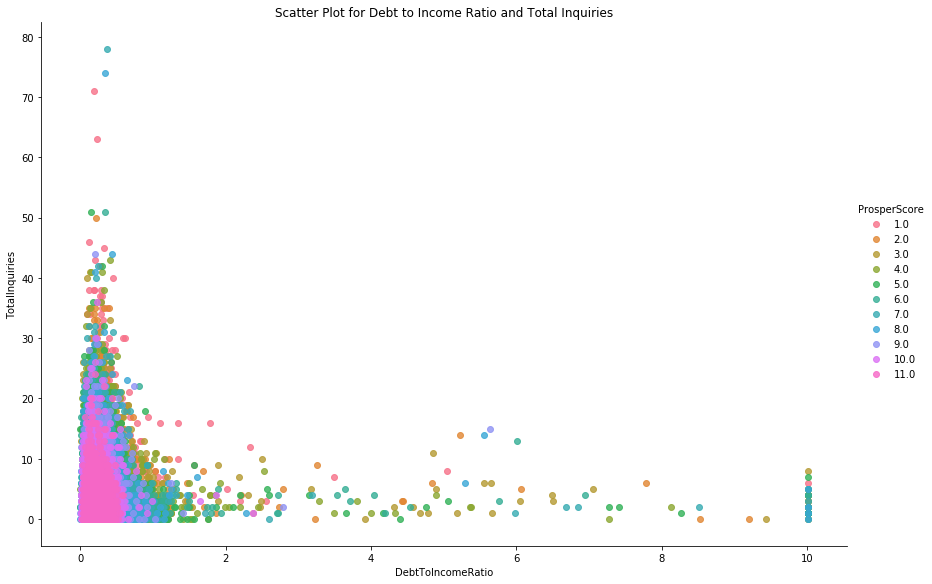

In [23]:
sb.lmplot(data = df, x = 'DebtToIncomeRatio', y = 'TotalInquiries',fit_reg = False, hue = 'ProsperScore', height = 8,aspect = 1.5)
plt.title('Scatter Plot for Debt to Income Ratio and Total Inquiries')

> From the above chart, we can say Debt to Income Ratio plays an important factor in Prosper Score, we can see a lot of the pink-ish area are range from Total Inqueries range from 0 to 20, but Debt to Income to Ratio has stay within a certain range. What's also interesting is that those Debt to Income Ratio are particularly high like close to 10 even have a 6 or 7 ProsperScore, that gets me thinking maybe both factors play important roles in affecting ProsperScore. 

Text(0.5, 1.0, 'Heatmap for Total Prosper Payment Billed and ProsperScore')

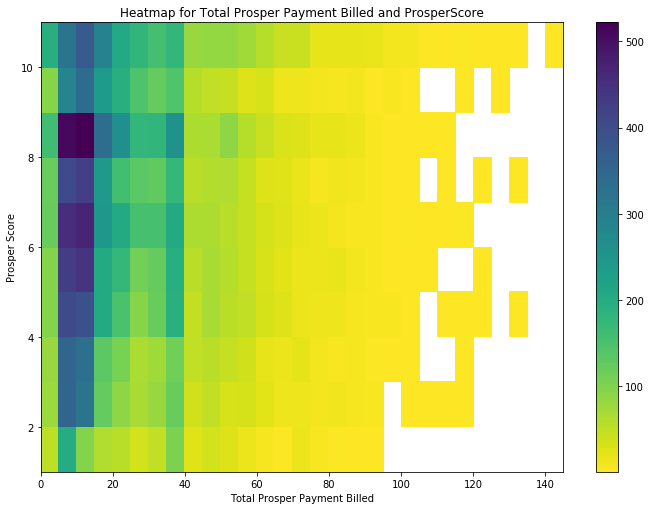

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
bins_x = np.arange(0,df['TotalProsperPaymentsBilled'].max()+5,5)
bins_y = np.arange(1,df['ProsperScore'].max()+1,1)
plt.hist2d(data = df, x = 'TotalProsperPaymentsBilled', 
           y = 'ProsperScore', 
           bins = [bins_x,bins_y],
           cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Total Prosper Payment Billed')
plt.ylabel('Prosper Score')
plt.title('Heatmap for Total Prosper Payment Billed and ProsperScore')

> We can see from the graph, most number are clustered on payments less than 20, and majority are clustered less than 40 on time payments, and the score really varies on the ProsperScore, but it seems as long you make more than 10 on time payment, you will have a score ranging from 6 to 8. 

Text(0.5, 1.0, 'Clustered Bar chart for Listing Category')

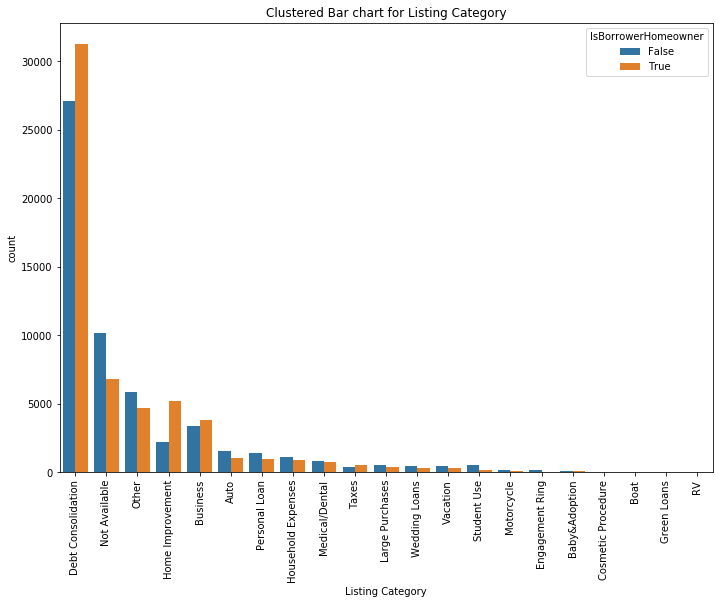

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sb.countplot(data = df, x = 'ListingCategory (numeric)', hue = 'IsBorrowerHomeowner', 
             order = df['ListingCategory (numeric)'].value_counts().index)
x = np.arange(21)
plt.xticks(x,('Debt Consolidation','Not Available','Other','Home Improvement','Business',
             'Auto','Personal Loan','Household Expenses','Medical/Dental','Taxes','Large Purchases',
              'Wedding Loans','Vacation','Student Use','Motorcycle','Engagement Ring','Baby&Adoption',
               'Cosmetic Procedure','Boat','Green Loans','RV'),rotation = 90)
plt.xlabel('Listing Category')
plt.title('Clustered Bar chart for Listing Category')

> From the above chart, we're able to see that there are more non-homeowner take out loan than homeowner. But surprisingly, more homeowner take out loan for Debt Consolidation than non-homeowner. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the first scatterplot, we can say Debt to Income Ratio plays an important factor in Prosper Score, we can see a lot of the pink-ish area are range from Total Inqueries range from 0 to 20, but Debt to Income to Ratio has stay within a certain range. What's also interesting is that those Debt to Income Ratio are particularly high like close to 10 even have a 6 or 7 ProsperScore, that gets me thinking maybe both factors play important roles in affecting ProsperScore. 

>In the second heatmap, we're able to see that most number are clustered on payments less than 20, and majority are clustered less than 40 on time payments, and the score really varies on the ProsperScore, but it seems as long you make more than 10 on time payment, you will have a score ranging from 6 to 8.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In the third clustered bar chart, we're able to see that there are more non-homeowner take out loan than homeowner. But surprisingly, more homeowner take out loan for Debt Consolidation than non-homeowner, it's probably because they have so many small debt, they want to put it all together and pay off with the loan they take out from Prosper.

## Multivariate Exploration


Text(0.5, 1.0, 'Scatterplot for Monthly Payment and Total Prosper Payments Billed')

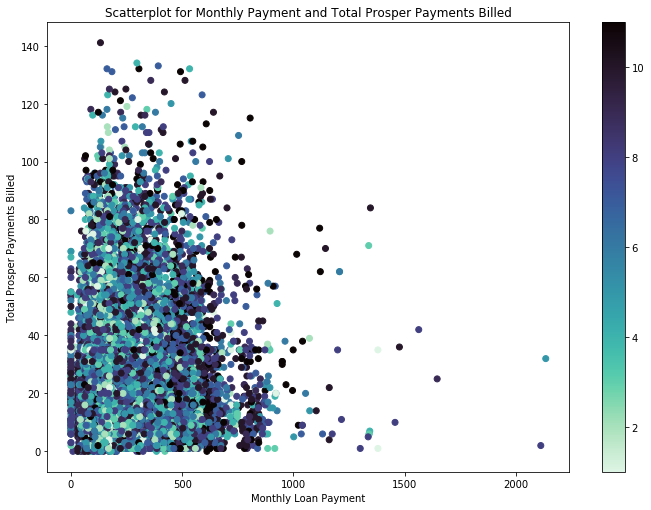

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(data = df, x ='MonthlyLoanPayment', y ='TotalProsperPaymentsBilled', c = 'ProsperScore',cmap = 'mako_r')
plt.colorbar()
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Total Prosper Payments Billed')
plt.title('Scatterplot for Monthly Payment and Total Prosper Payments Billed')

> In the above scatterplot with Prosper Score as a third variable, we're able to see that most people have good prosperscore are either with high monthly loan payment with less total payment made or with less payment and more payments history. 

Text(0.5, 1.0, 'Clustered Barplot for ProsperScore and Debt to Income Ratio')

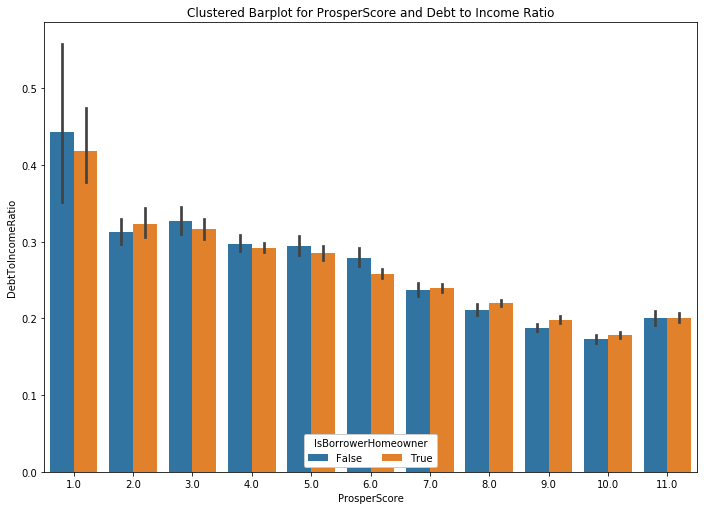

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sb.barplot(data = df, x = 'ProsperScore', y = 'DebtToIncomeRatio', hue = 'IsBorrowerHomeowner')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'IsBorrowerHomeowner')
plt.title('Clustered Barplot for ProsperScore and Debt to Income Ratio')

> From the above barplot, we're able to see ProsperScore 1 have much higher variability in terms of Debt To Income Ratio than any other ProsperScore, I think it's because there are other factors affecting the the ProsperScore. 

Text(0.5, 1.0, 'Pointplot for ProsperScore and Monthly Loan Payments')

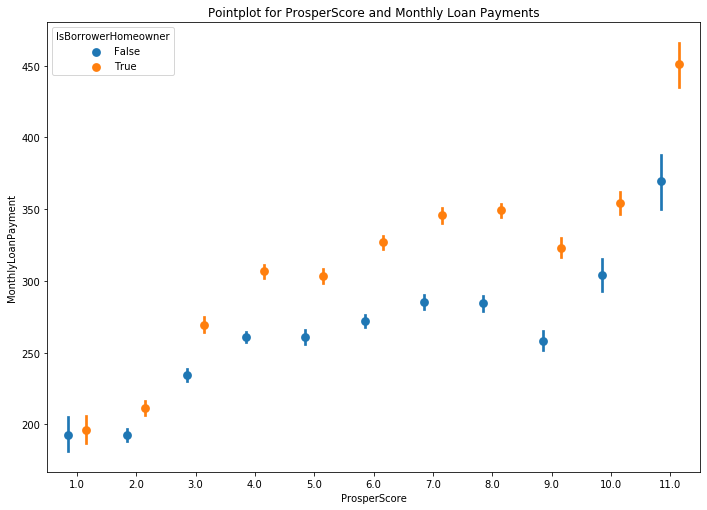

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sb.pointplot(data = df, x = 'ProsperScore', y = 'MonthlyLoanPayment', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "")
plt.title('Pointplot for ProsperScore and Monthly Loan Payments')

> From the pointplot, we can say in general, non-homeowners' monthly payments are smaller than homeowner. And ProsperScore of 1 and 11 have high variability in terms of the monthly payment, that also indicates that there are one more factors affecting the prosperscore other than Monthly Payment amount. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the above scatterplot with Prosper Score as a third variable, we're able to see that most people have good prosperscore are either with high monthly loan payment with less total payment made or with less payment and more payments history. 

> In the above scatterplot with Prosper Score as a third variable, we're able to see that most people have good prosperscore are either with high monthly loan payment with less total payment made or with less payment and more payments history. 

> From the pointplot, we can say in general, non-homeowners' monthly payments are smaller than homeowner. And ProsperScore of 1 and 11 have high variability in terms of the monthly payment, that also indicates that there are one more factors affecting the prosperscore other than Monthly Payment amount.

### Were there any interesting or surprising interactions between features?

> In the clustsred bar chart and pointplot, I can say homeowner tends to have lower debt to income ratio and high monthly payment than non-homeowner. 